<a href="https://colab.research.google.com/github/jx-dohwan/-Deep_Learning_from_Scratch_2_study/blob/main/CH5_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH5_순환신경망(RNN)
> 지금까지 상펴본 신경망은 피드포워드(feed forward)라는 유형의 신경망이다. 쉽게 말하면 단방향인 신경망을 말한다. 피드포워드 신경망에서는 시계열 데이터의 성질(패턴)을 충분히 학습할 수 없다. 그래서 순환 신경망(RNN)이 등장하게 된다. 

## 1. 확률과 언어 모델
> wrod2vec를 복습하고 자연어에 관한 현상을 '확률'을 사용해서 기술하고, 마지막에는 언어를 확률로 다루는 '언어 모델'에 대해 설명한다.

### 1) word2vec을 확률 관점에서 바라보다
> CBOW 모델을 학습시키는 본래 목적은 맥락으로부터 타깃을 정확하게 추측하는 것이다. 이 목적을 위해 학습을 진행하면, 단어의 의미가 인코딩된 단어의분산표현을 얻을 수 있다.<br><br> 그러면 CVOW 모델의 본래 목적인 맥락으로부터 타깃을 추측하는 것은 어디에 이용될 수 있을까? 여기에서 언어 모델이 등장한다.



### 2) 언어 모델
> 언어 모델은 단어 나열에 확률을 부여한다. 특정한 단어의 시퀀스에 대해서, 그 시퀀스가 일어날 가능성이 어느 저옫인지를 확률로 평가하는 것이다. 이 언어 모델은 다양하게 응용될 수 있다. 기계번역과 음성인식이 대표적인 예이다. <br><br> 이 언어 모델은 다양하게 응용할 수 있다. 기계 번역과 음성 인식이 대표적인 예이다. 예를 들어 음성 인식 시스템의 경우, 사람의 음성으로부터 몇개의 문장을 후보로 생성할 것이다. 그럼 다음 모델을 사용하여 후보 문장이 문장으로써 자연스러운지를 기준으로 순서를 매길 수 있다. 또한 새로운 문장을 생성하는 용도로 이용할 수 있다. 왜냐하면 언어 모델은 단어 순서의 자연스러움을 확률적으로 평가할 수 있기 때문이다. 

## 2. RNN이란
> RNN(Recurrent Neural Network)의 Recurrent는 라틴어에서 온 말로 몇 번이나 반복해서 일어나는 일을 뜻한다. 우리말로는 순환핟다 로 직역이 된다. 

### 1) 순환하는 신경망
- RNN의 특징
  - 순환하는 경로가있다. 이 순환 경로를 따라 데이터는 끊임없이 순환할 수 있다.
  - 그리고 데이터가 순환되기 때문에 과거의 정보를 기억하는 동시에 최신 데이터로 갱신될 수 있다.
- RNN 계층
  - 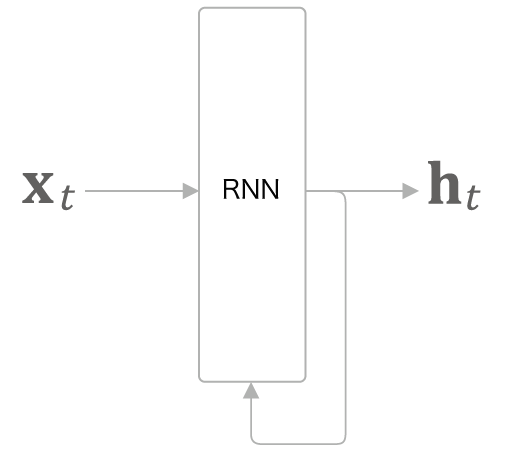
  - 각 시각에 입력되는 xt는 벡터라고 가정하자
  - 문장(단어 순서)을 다루는 경우를 예로 든다면 각 단어의 분산 표현(단어 벡터)이 xt가 되며
  - 이 분산 표현이 순서대로 하나씩 RNN계층에 입력되는 것이다. 
  - 잘 보면 출력이 2개로 분기되는것을 알 수 있다. 여기서 분기란 복제되어 분기함을 뜻한다.
  - 이렇게 분기된 출력 중 하나가 자기 자신에게 입력된다.(즉 순환)

### 2) 순환 구조 펼치기
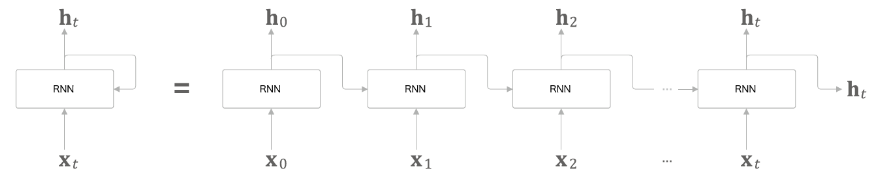

- RNN 계층의순환 구조를 펼침으로써 오른쪽으로 성장하는 긴 신경망으로 변신 시킬 수 있다.
- 지금까지 본 피드포워드 신경망과 같은 구조이다.
- 다만 위 그림에서 등장하는 다수의 RNN 계층 모두가 실제로는 '같은 계층'인 것이 지금까지의 신경망과는 다르다는 점이다.
- 추가적으로 시계열 데이터는 시간 방향으로 나열된다 따라서 시계열 데이터의 인덱스를 가리킬 때는 시각 이라는 용어를 사용한다.


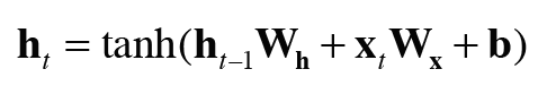
- 각 시각의 RNN 계층은 그 계층으로의 입력과 1개 전의 RNN 계층으로부터 출력을 받는다.
- 그리고 이 두 정보를 바탕으로 현 시각의 출력을 계산한다.
- 이때 수행하는 계산의 수식이 위의 그림과 같은 것이다.
  - RNN에서는 가중치가 2개 있다. 
    - 하나는 입력 x를 출력 h로 변환하기 위한 가중치 Wx이고
    - 다른 하나는 1개의 RNN 출력을 다음 시각의 출력으로 변환하기 위한 가중치 Wh이다.
    - 또한 편항 b도 있다.
    - 참고로 ht-1과 xt는 행벡터이다.
  - 위 식에서는 행렬 곱을 계산하고, 그 합을 tanh함수(쌍곡탄젠트)를 이용해 변환한다.
    - 그 결과가 t의 시각 출력 ht가 된다.
    - 이 ht는 다른 계층을 향해 위쪽으로 출력되는 동시에
    - 다음 시각의 RNN계층을 향해 오른쪽으로도 출력 된다.
  - 그런데 현재의 출력(ht)은 한 시각 이전 출력(ht-1)에 기초해 계산됨을 알 수 있다.
  - 다른 관점에서 보면 RNN은 h라는 상태를 가지고 있으며
  - 위 식의 형태로 갱신된다고 해석할 수 있다.
  
> 그래서 RNN계층을 상테를 가지는 계층 혹은 메모리가 있는 계층이라고 한다.

### 3) BPTT

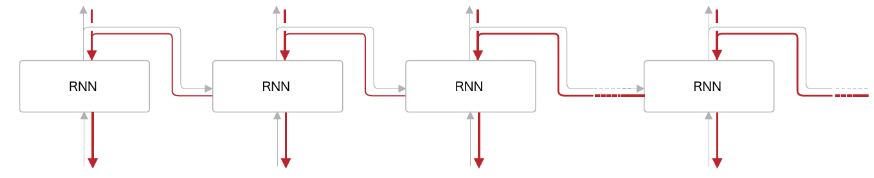

- 순환 구조를 펼친 후의 RNN에는 오차역전파법을 적용할 수 있다. 
- 즉, 먼저 순전파를 수행하고, 이어서 역전파를 수행하여 원하는 기울기를 구할 수 있다.
- 여기서의 오차역전파법은 시간 방향으로 펼친 신경망의 오차역전파법이란 뜻으로 BPTT(Backpropagation Through Time)라고 한다.
- 문제점 : 시간 크기가 커지면 역전파 시의 기울기가 불안정해지고, 시간 크기가 커지는 것에 비례하여 BPTT가 소비하는 컴퓨팅 자원도 증가하게 된다. 

### 4) Truncated BPTT
> 큰 시계열 데이터를 취급할 때는 흔히 신경망 연결을 적당한 길이로 끊는다. 시간축방향으로 너무 길어진 신경망을 적당한 지점에서 잘라내어 작은 신경망 여러 개로 만든다는 아이디어 있다. 그리고 이 잘라낸 작은 신경망에서 오차역전파법을 수행한다. 이것이 바로 Truncated BPTT라는 기법이다.

- 순전파의 흐름은 끊어지지 않고 전파되고 역전파의 연결은 적당한 길이로 잘라내어 잘라낸 신경망 단위로 학습을 수행한다.

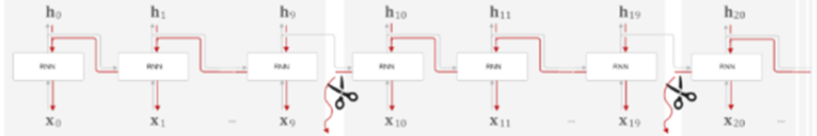

> 반드시 기억해야할 것은 역전파의 연결은 끊기지만 순전파의 연결은 끊어지지 않는다. 그러므로 RNN을 학습시킬 때는 순전파가 연결된다는 점을 고려해야한다. 즉 데이터를 순서대로 입력해야 한다는 뜻이다. 

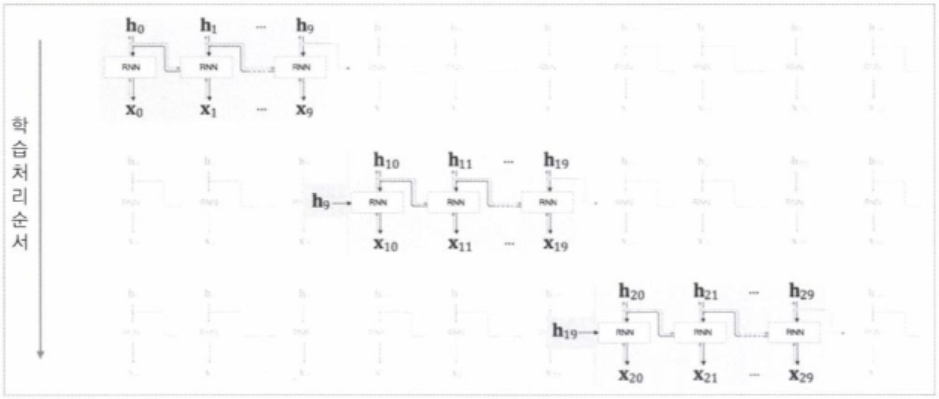

> 이런 식으로 순전파의 연결을 유지하면서 블록 단위로 오차역전파법을 적용할 수 있다.

### 5) Truncated BPTT의 미니배치 학습
> 지금까지의 Truncated BPTT 이야기에서는 미니배치 학습 시 각각의 미니배치가 어떤 식으로 이뤄지는지에 대해서는 생각하지 않았다. 하지만 우리는 미니배치 학습을 수행하기 때문에, 원래대로라면 구체적인 배치 방식을 고려해 위의 그림처럼 데이터를 순서대로 입력해야한다. 그렇게 하려면 데이터를 주는 시작 위치를 각 미니배치의 시작위치로 옮겨줘야 한다. <br><br> 예를 들면 첫번째 미니배치때는 처음부터 순서대로 데이터를 제공하고 두번째 미니배치때는 500번째 부터 데이터를 시작위치를 정하고 다시 순서대로 데이터를 제공하는 것이다.


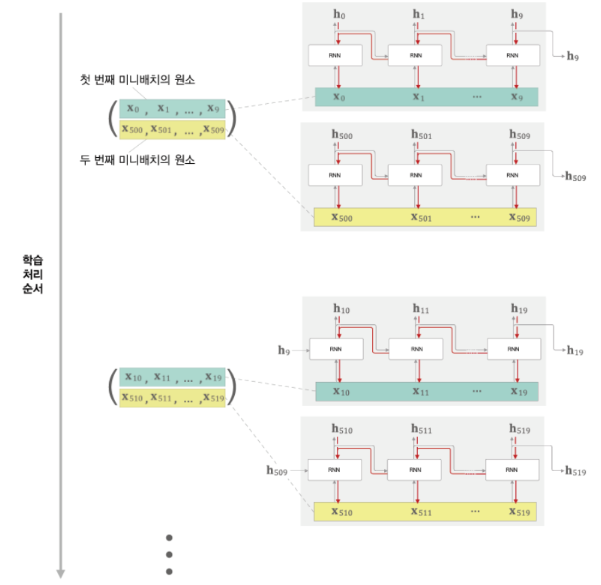

- 이 미니배치 데이터를 RNN의 입력 데이터로 사용해 학습을 수행한다. 
- 이후로는 순서대로 진행되므로 다음에 넘길 데이터는 각각 시계열 데이터의 10~19 번째 데이터와 510~519번째 데이터가 되는식이다.

> 이처럼 미니배치 학습을 수행할 때는 각 미니배치의 시작 위치를 오프셋으로 옮겨준 후 순서대로 제공하면 된다. 또한 데이터를 순서대로 입력하다가 끝에 도달하면 다시 처음부터 입력하도록 한다.

## 3. RNN 구현

### 1) RNN 계층 구현
> RNN 처치를 한 단계만 수행하는 RNN 클래스부터 구현해보고자 한다.

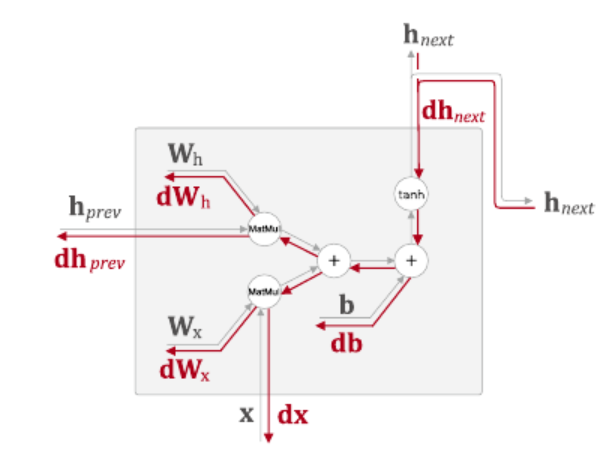

In [4]:
import numpy as np
class RNN:
  def __init__(self, Wx, Wh, b): # 가중치 2개와 편향 1개를 인수로 받는다.
    self.params = [Wx, Wh, b] # 인수로 받은 매개변수를 인스턴스 변수에 넣는다
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)] # 각 매개변수에 대응하는 형태로 기울기를 초기화한 후 저장한다.
    self.cache = None # 역전파 계산 시 사용하는 중간 데이터를 담을 cache를 None으로 초기화 한다.

  def forward(self, x, h_prev): # 아래로부터 입력 x와 왼쪽으로부터 입력 h_prev를 받는다.
    Wx, Wh, b = self.params
    t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b # matmul은 행렬곱
    h_next = np.tanh(t) # 현 시각 RNN계층으로부터의 출력

    self.cache = (x, h_prev, h_next) 
    return h_next

  def backward(self, dh_next):
    Wx, Wh, b = self.params
    x, h_prev, h_next = self.cache

    dt = dh_next * (1-h_next**2)